<a href="https://colab.research.google.com/github/pathakchiranjit/Twitter_Sentiment_Analysis/blob/main/Twitter_sentiment_Analysis_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
!pip install langdetect

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import holoviews as hv
from holoviews import opts
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
hv.extension('bokeh')
import lightgbm as lgb
import nltk
from nltk.util import ngrams
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import shap
shap.initjs()

In [ ]:
import datetime
import pandas as pd
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
analyzer = SentimentIntensityAnalyzer()

In [ ]:
!pip install twint 
!pip install nest_asyncio

In [ ]:
!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
!pip install -qq whatthelang

In [ ]:
import twint 
import nest_asyncio 
nest_asyncio.apply()

In [ ]:
c = twint.Config(Since='2021-05-21', Until='2021-06-08')

In [ ]:
c.Search= "#thefamilyman" 
c.Lang= 'en' 
c.Pandas= True
c.Limit= 7000

In [ ]:
twint.run.Search(c)

In [ ]:
twint.storage.panda.Tweets_df.shape

(2536, 38)

In [ ]:
# Cleanup
tweets = twint.storage.panda.Tweets_df.drop_duplicates(subset=['id'])

In [ ]:
tweets.shape

(2536, 38)

In [ ]:
# Reindex
tweets.index = range(len(tweets))

In [ ]:
# Remove non-english
from whatthelang import WhatTheLang
wtl = WhatTheLang()

In [ ]:
# This function makes easy to handle exceptions (e.g. no text where text should be)
# not really needed but can be useful 

def detect_lang(text):
    try: 
        return wtl.predict_lang(text)
    except Exception:
        return 'exp'

In [ ]:
# Added performance measure here...you can leave teh %%time line out

%%time

tweets['lang'] = tweets['tweet'].map(lambda t: detect_lang(t))

CPU times: user 119 ms, sys: 1.65 ms, total: 120 ms
Wall time: 122 ms


In [ ]:
# keep only english

tweets = tweets[tweets.lang == 'en']

In [ ]:
tweets.tail(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,lang
2531,1395621250731429891,1395621250731429891,1.621577e+12,2021-05-21 06:03:30,+0000,,#Poll:- Which of these two series you think is...,en,"[poll, thefamilyman, specialops]",[],1264464450289119234,1264464450289119234,filmybaap,filmybaapOfficial,5,06,https://twitter.com/filmybaap/status/139562125...,[],[],0,,False,0,0,0,,#thefamilyman,,,,,,,[],,,,,en
2532,1395615227446652930,1395615227446652930,1.621576e+12,2021-05-21 05:39:34,+0000,,@BajpayeeManoj has taught us the exact use of...,en,[thefamilyman],[],1096468864987103233,1096468864987103233,royankush26,',5,05,https://twitter.com/royankush26/status/1395615...,[],[],0,,False,0,0,0,,#thefamilyman,,,,,,,[],,,,,en
2533,1395585345312284675,1395585345312284675,1.621568e+12,2021-05-21 03:40:49,+0000,,Two Lioness from south 🦁 Ruling OTT Webseries ...,en,"[novemberstory, tamannaah, thefamilyman2, sama...",[],1256920225494077441,1256920225494077441,BeingAravind_,Aravind 🇮🇳,5,03,https://twitter.com/BeingAravind_/status/13955...,[],[https://pbs.twimg.com/media/E14dcpRUcAEIxgM.j...,1,https://pbs.twimg.com/media/E14dcpRUcAEIxgM.jpg,False,18,0,4,,#thefamilyman,,,,,,,[],,,,,en
2534,1395583350866268160,1395527629470588929,1.621568e+12,2021-05-21 03:32:54,+0000,,@TamilGuardian @Samanthaprabhu2 make a thank y...,en,"[thefamilyman, familyman2_against_tamils]",[],1341753640218894337,1341753640218894337,worldwidetamilz,வேலுபிரபாகரன்🇰🇬(tamildesam),5,03,https://twitter.com/worldwidetamilz/status/139...,[],[],0,,False,2,0,2,,#thefamilyman,,,,,,,"[{'screen_name': 'TamilGuardian', 'name': 'Tam...",,,,,en
2535,1395581028308164612,1395581028308164612,1.621567e+12,2021-05-21 03:23:40,+0000,,#KanganaRanaut all praises for #SamanthaAkkin...,en,"[kanganaranaut, samanthaakkineni, thefamilyman...",[],2402071040,2402071040,imshiva17,SHIV DUTTA 🌠,5,03,https://twitter.com/imshiva17/status/139558102...,[],[https://pbs.twimg.com/media/E14Zhv9WYAACe4C.j...,1,https://pbs.twimg.com/media/E14Zhv9WYAACe4C.jpg,False,46,0,17,,#thefamilyman,,,,,,,[],,,,,en


In [ ]:
import pandas as pd
data= pd.DataFrame(tweets["tweet"])

In [ ]:
data.head()

,tweet
0,https://t.co/sUCvXiWR5k Check this out P.S - ...
1,https://t.co/sUCvXjestU Check this out.. P.S ...
2,chellam sir already knows how to tackle operat...
3,Now a days the series on Amazon / Netflix has ...
4,#ChellamSir ko sab pata hai 😂😂😂 #TheFamilyMan...


In [ ]:
# import nltk libraries

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

In [ ]:
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")

In [ ]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

In [ ]:
nltk.download("stopwords")
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove stopwords

def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

In [ ]:
data.head(10)

In [ ]:
# Porter Stemmer
ps= nltk.PorterStemmer()

In [ ]:
# stemming 

def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

In [ ]:
data = data.reset_index()
data.drop('index',axis=1,inplace=True)
data

In [ ]:
data_list = data.loc[:,"tweet"].to_list()
len(data_list)

2336

In [ ]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

39915

In [ ]:
data_count= pd.DataFrame(flat_data_list)

In [ ]:
data_count= data_count[0].value_counts()

In [ ]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
tweets.columns

In [ ]:
cols = ['date', 'timezone','tweet', 'language', 'hashtags', 'username', 'day', 'hour', 'retweet', 'nlikes', 'nreplies', 'nretweets']
project_data = tweets[cols]

In [ ]:
project_data.tail(5)

In [ ]:
project_data.day.unique()

In [ ]:
project_data['date'] = pd.to_datetime(project_data['date'])
project_data['Day']=project_data['date'].dt.day_name()
project_data['Day_number']=project_data['date'].dt.dayofweek                  #The day of the week with Monday=0, Sunday=6.
project_data.head(3)

In [ ]:
def hr_func(ts):
    return ts.hour
project_data['Time'] = project_data['date'].apply(hr_func)

In [ ]:
project_data.drop('hour',axis=1,inplace=True)

In [ ]:
STOPWORDS.update(["cm", "kg", "mr", "wa" ,"nv", "ore", "da", "pm", "am", "cx","http","co"])
print(STOPWORDS)

In [ ]:
def nlp_preprocesser(row):
    from nltk import tokenize,stem
    sentence = row
    #convert all characters to lowercase
    lowered = sentence.lower()
    tok = tokenize.word_tokenize(lowered)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

In [ ]:
project_data['Description_processed'] = project_data['tweet'].apply(nlp_preprocesser)
project_data.head(3)

## Vader Sentiment

In [ ]:
def sentiment2score(text):
    analyzer = SentimentIntensityAnalyzer()
    sent_score = analyzer.polarity_scores(text)["compound"]
    return float(sent_score)

In [ ]:
project_data['Description_sentiment_score'] = project_data['tweet'].apply(lambda x: sentiment2score(x))
project_data.head(3)

## Textblob

In [ ]:
!pip install -q textblob 

In [ ]:
def text_sentiment(text):
    from textblob import TextBlob
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

In [ ]:
project_data['Description_sentiment_score_txtb'] = project_data['tweet'].apply(lambda x: text_sentiment(x))
project_data.head(3)

## Flair

In [ ]:
!pip install -q flair 

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  value = sentence.labels[0].to_dict()['value']
  if value == 'POSITIVE':
       result = sentence.labels[0].to_dict()['confidence']
  else:
       result = - (sentence.labels[0].to_dict()['confidence'])
  return round(result,3)

In [ ]:
project_data['Description_sentiment_score_flair'] = project_data['tweet'].apply(lambda x: text_sentiment_flair(x))
project_data.head(3)

In [ ]:
g=sns.displot(project_data, x="Time", col="Day_number",multiple="dodge",bins =24)
g.fig.set_size_inches(20,5)

In [ ]:
def ngram_func(ngram, trg='', trg_value=''):
    #trg_value is list-object
    if (trg == '') or (trg_value == ''):
        string_filterd =  project_data['Description_processed'].sum().split()
    else:
        string_filterd =  project_data[project_data[trg].isin(trg_value)]['Description_processed'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
hv.Bars(ngram_func(1)[::-1]).opts(title="Unigram Count top-30", color="red", xlabel="Unigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
hv.Bars(ngram_func(2)[::-1]).opts(title="Bigram Count top-30", color="yellow", xlabel="Bigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
hv.Bars(ngram_func(3)[::-1]).opts(title="Trigram Count top-30", color="blue", xlabel="Trigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
s1 = hv.Bars(ngram_func(1)[0:15][::-1]).opts(title="Unigram Count top-30", color="red", xlabel="Unigrams", ylabel="Count")
s2 = hv.Bars(ngram_func(2)[0:15][::-1]).opts(title="Bigram Count top-30", color="yellow", xlabel="Bigrams", ylabel="Count")
s3 = hv.Bars(ngram_func(3)[0:15][::-1]).opts(title="Trigram Count top-30", color="blue", xlabel="Trigrams", ylabel="Count")
(s1 + s2 + s3).opts(opts.Bars(width=600, height=500,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False)).opts(shared_axes=False).cols(3)

In [ ]:
wordcloud = WordCloud(width = 1800, height = 1000, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(project_data['Description_processed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
v1 = hv.Curve(project_data.groupby('Time')["Description_sentiment_score"].mean())\
    .opts(opts.Curve(xlabel="Time", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Time wise Average Sentiment Score'))
v2 = hv.Curve(project_data.groupby('Day_number')["Description_sentiment_score"].mean())\
    .opts(opts.Curve(xlabel="Date", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Date wise Average Sentiment Score'))
(v1 + v2).cols(1)

In [ ]:
%env HV_DOC_HTML=true
hv.extension('bokeh')
v1 = hv.Curve(project_data.groupby('Time')["Description_sentiment_score"].mean())\
    .opts(opts.Curve(xlabel="Time", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Time wise Average Sentiment Score : VDR'))
v2 = hv.Curve(project_data.groupby('Day_number')["Description_sentiment_score"].mean())\
    .opts(opts.Curve(xlabel="Date", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Date wise Average Sentiment Score : VDR'))
v3 = hv.Curve(project_data.groupby('Time')["Description_sentiment_score_txtb"].mean())\
    .opts(opts.Curve(xlabel="Time", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Time wise Average Sentiment Score : Txtblob'))
v4 = hv.Curve(project_data.groupby('Day_number')["Description_sentiment_score_txtb"].mean())\
    .opts(opts.Curve(xlabel="Date", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Date wise Average Sentiment Score : Txtblob'))
v5 = hv.Curve(project_data.groupby('Time')["Description_sentiment_score_flair"].mean())\
    .opts(opts.Curve(xlabel="Time", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Time wise Average Sentiment Score: Flair'))
v6 = hv.Curve(project_data.groupby('Day_number')["Description_sentiment_score_flair"].mean())\
    .opts(opts.Curve(xlabel="Date", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Date wise Average Sentiment Score : Flair'))
(v1 + v2 + v3 + v4 + v5 + v6).cols(2)

In [ ]:
project_data.describe()

In [ ]:
df = project_data.copy()

In [ ]:
df.head(3)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df['Description_sentiment_score'], bins=20, ax=ax)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df['Description_sentiment_score_txtb'], bins=20, ax=ax)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df['Description_sentiment_score_flair'], bins=20, ax=ax)
plt.show()

In [ ]:
df.index = pd.to_datetime(df['date'])
df['mean_vdr'] = df['Description_sentiment_score'].expanding().mean()
df['rolling_vdr'] = df['Description_sentiment_score'].rolling('6h').mean()
df['mean_txtb'] = df['Description_sentiment_score_txtb'].expanding().mean()
df['rolling_txtb'] = df['Description_sentiment_score_txtb'].rolling('6h').mean()
df['mean_flair'] = df['Description_sentiment_score_flair'].expanding().mean()
df['rolling_flair'] = df['Description_sentiment_score_flair'].rolling('6h').mean()

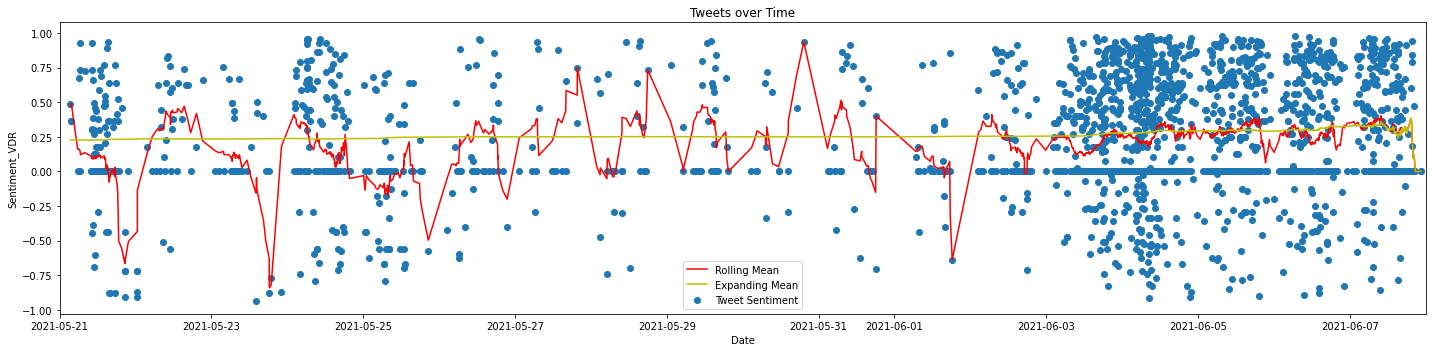

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['Description_sentiment_score'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling_vdr'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean_vdr'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2021,5,21),dt.date(2021,6,8)])
ax.set(title='Tweets over Time', xlabel='Date', ylabel='Sentiment_VDR')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

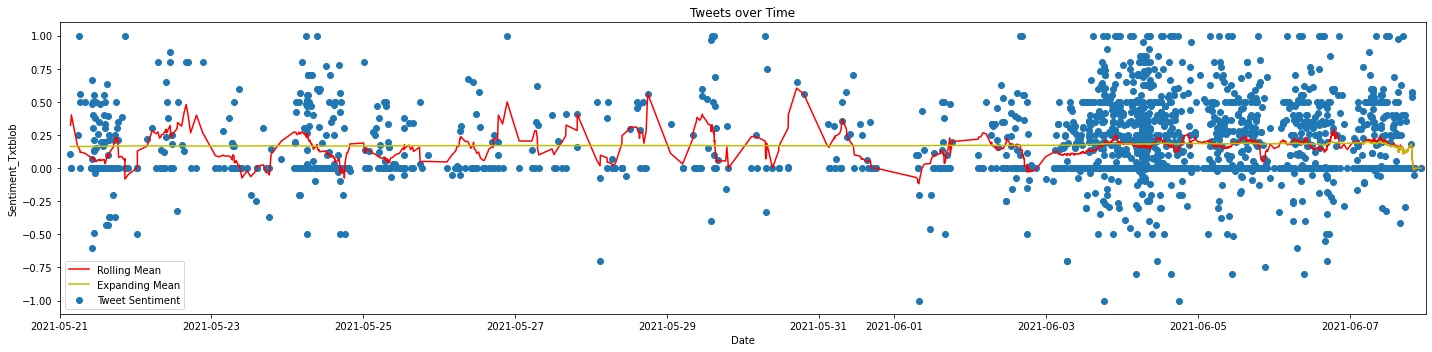

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['Description_sentiment_score_txtb'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling_txtb'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean_txtb'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2021,5,21),dt.date(2021,6,8)])
ax.set(title='Tweets over Time', xlabel='Date', ylabel='Sentiment_Txtblob')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

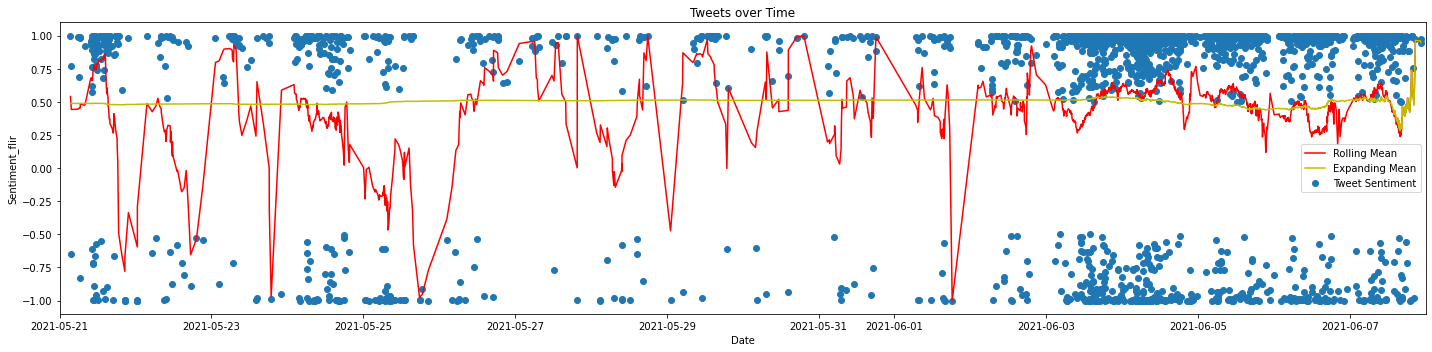

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['Description_sentiment_score_flair'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling_flair'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean_flair'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2021,5,21),dt.date(2021,6,8)])
ax.set(title='Tweets over Time', xlabel='Date', ylabel='Sentiment_flir')
ax.legend(loc='best')
fig.tight_layout()
plt.show()